# Importing necessary dependencies

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm


# Data collection and processing

In [14]:
loan_dataset=pd.read_csv('loan.csv')

In [15]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
loan_dataset.shape # 614 rows and 13 columns


(614, 13)

In [17]:
# lets check statistical features of non categorical features
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
# lets check now all the nulll values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# since there are very less null values we can safely remove them 
loan_dataset=loan_dataset.dropna()

In [20]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
#label encoding
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [22]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [23]:
loan_dataset['Dependents'].value_counts() #3+ is to be converted to 4 (int)

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [24]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [25]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Visualisation

<AxesSubplot:xlabel='Education', ylabel='count'>

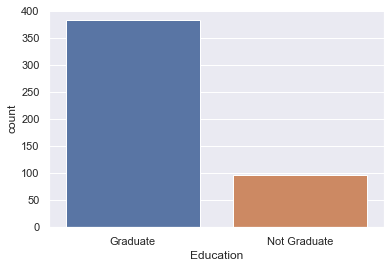

In [27]:
sns.set()
sns.countplot(x='Education',data=loan_dataset)

<AxesSubplot:xlabel='Education', ylabel='count'>

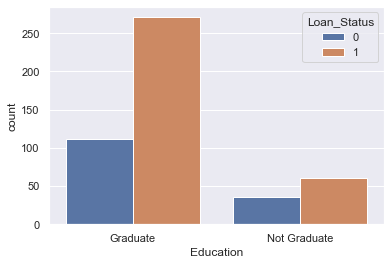

In [28]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset) # clearly visible that graduates have a higher probability of 
#getting loans approved.

<AxesSubplot:xlabel='Married', ylabel='count'>

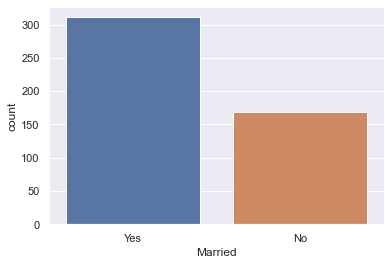

In [29]:
# lets check the same for other features
sns.countplot(x='Married',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

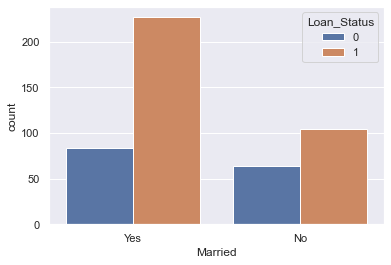

In [30]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset) # married people have greater chance of getting loans approved.

<AxesSubplot:xlabel='Gender', ylabel='count'>

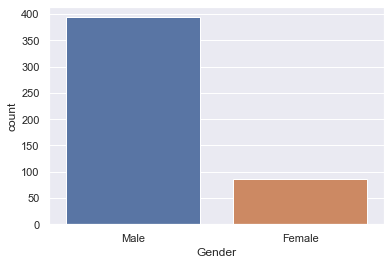

In [31]:
sns.countplot(x='Gender',data=loan_dataset)          # male candidadtes applyiing for loans is lot higher than female candidates

<AxesSubplot:xlabel='Gender', ylabel='count'>

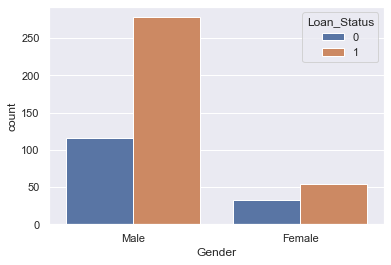

In [32]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset) 
# This shows higher chances of loans approved for males. In earlier days business and other economic activities were managed 
# mostly by men and women were discouraged to do so . Since the dataset contains previous records too , hence there is slight
# prejudice in it.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

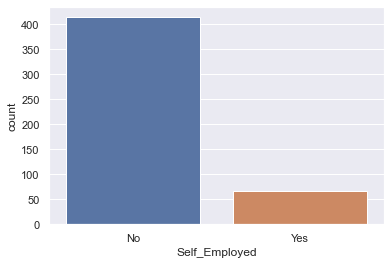

In [33]:
sns.countplot(x='Self_Employed',data=loan_dataset)   

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

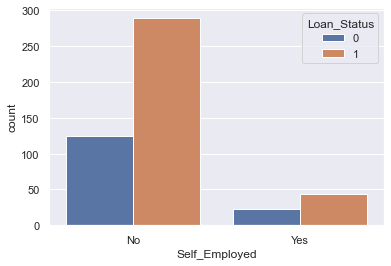

In [34]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset) 

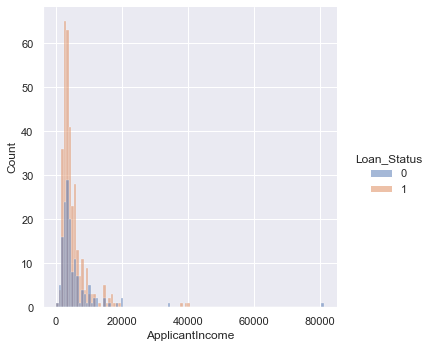

In [36]:
sns.displot(data=loan_dataset,x='ApplicantIncome',hue='Loan_Status')

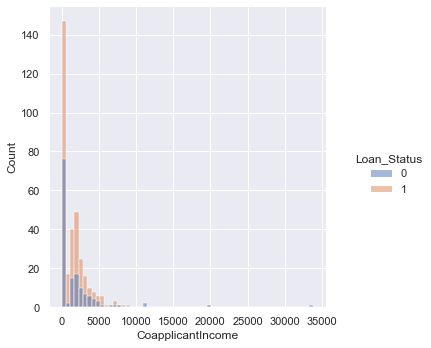

In [37]:
sns.displot(data=loan_dataset,x='CoapplicantIncome',hue='Loan_Status')

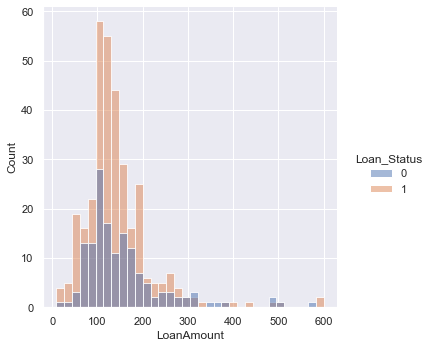

In [39]:
sns.displot(data=loan_dataset,x='LoanAmount',hue='Loan_Status')

In [40]:
# #Now lets convert all the categorical values to numerical to train our model. We can use label encoding provided by sklearn but
# its easier to directly use the replace method available in pandas.
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


In [41]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [42]:
# separating the dependent and independent variables
X=loan_dataset.drop(columns=['Loan_Status','Loan_ID'],axis=1) # loan_ID is not required .
Y=loan_dataset['Loan_Status']

In [43]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [44]:
Y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [45]:
# Splitting training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


In [47]:
# model training
classifier=svm.SVC(kernel='linear')

In [48]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [49]:
X_train_prediction= classifier.predict(X_train)

In [50]:
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [51]:
training_accuracy   # we get 77% training data accuracy .

0.7786458333333334

In [52]:
X_test_prediction = classifier.predict(X_test)
test_accuray = accuracy_score(X_test_prediction,Y_test)

In [53]:
test_accuray  # 81% accuracy on test data

0.8125

In [56]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
from sklearn import preprocessing

In [59]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled=scaler.transform(X_train) # without standardisation the maximum iterations were reached by the model.
regressor.fit(X_scaled,Y_train) # training the logistic regression model

LogisticRegression()

In [60]:
# lets check the accuracy on logistic regression
X_train_prediction= regressor.predict(X_scaled)
training_accuracy=accuracy_score(X_train_prediction,Y_train)
training_accuracy   # 80% accuracy on training data

0.8072916666666666

In [62]:
scaler=preprocessing.StandardScaler().fit(X_test)
X_test_scaled=scaler.transform(X_test)
X_test_prediction=regressor.predict(X_test_scaled)
test_accuracy=accuracy_score(X_test_prediction,Y_test)
test_accuracy   #82 % accuracy on test data        ... conclusion ->Logistic Regresion is a better classifier for this data. 

0.8229166666666666

# THE END